In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
from salishsea_tools import nc_tools
from salishsea_tools import bathy_tools

Copy the original smoothed bathymetry into a new .nc file with the marker "2"

In [2]:
!cp ../../NEMO-forcing/grid/bathy_downonegrid.nc bathy_downonegrid2.nc
bathy = nc.Dataset('bathy_downonegrid2.nc', 'r+')
depths = bathy.variables['Bathymetry']
# copy the depths array into newdepths
newdepths = depths[:,:]
newdepths.shape

(898, 398)

In "depths and newdepths" we have the original bathymetry.  In "core" we will put the bathymetry for the mouth of Juan de Fuca. In "north" we will put the bathymetry for the mouth of Johnstone Strait.
Set all new areas as zeros to start to make sure they are new copies, not just new names of our arrays.
Watch the southern and northern ends of our arrays with care.

In [3]:
length = 898
width = 398
# remove the mask, i.e. make masked variables 0
newdepths[newdepths.mask] = 0
core = np.zeros(length)
core[:] = newdepths[:,0]
north = np.zeros(width)
north[:] = newdepths[897, :]
print (core[388:405])
print (newdepths[390:405,0])
print (core[465:470])
print ('North', north[32:72])

[   0.       21.625    35.25     71.3125  114.8125  130.8125  146.625
  158.625   188.3125  215.625   161.6875  168.6875  218.625   246.75
  260.75    261.75    269.875 ]
[35.25 71.3125 114.8125 130.8125 146.625 158.625 188.3125 215.625 161.6875
 168.6875 218.625 246.75 260.75 261.75 269.875]
[ 6.875  0.     0.     0.     0.   ]
North [   0.        0.        0.        0.        0.      117.8125  180.6875
  277.875   346.9375  347.9375  349.9375  341.9375  331.9375  260.75
  241.75    142.625    95.3125    0.        0.        0.        0.        0.
    0.        0.        0.        0.        0.        0.        0.        0.
    0.        0.        0.        0.        0.        0.        0.        0.
    0.        0.    ]


/home/sallen/anaconda/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:4: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.


Remove the little bank near the south side by rearranging the depths to be monotonic.  
North is monotonic

In [4]:
core[396] = newdepths[398,0]
core[397] = newdepths[399,0]
core[398] = newdepths[396,0]
core[399] = newdepths[397,0]
print (core[388:405])
print (core[465:470])

[   0.       21.625    35.25     71.3125  114.8125  130.8125  146.625
  158.625   161.6875  168.6875  188.3125  215.625   218.625   246.75
  260.75    261.75    269.875 ]
[ 6.875  0.     0.     0.     0.   ]


In [5]:
print (core[401:420])
print (core[465:470])

[ 246.75   260.75   261.75   269.875  286.875  307.875  302.875  299.875
  288.875  298.875  303.875  305.875  299.875  291.875  280.875  272.875
  262.75   256.75   249.75 ]
[ 6.875  0.     0.     0.     0.   ]


Rearrange the depths in the centre, so that they are a simple up and down: i.e. make the two deep channels into one.
At the same time, move the deepest point, one point to the south.  This emphasizes the southern channel, which is the channel that continues into Juan de Fuca.  We do this so there is no artifical sill in this channel which is not seen in the original bathymetry.

In [6]:
core[402] = newdepths[403,0]
core[403] = newdepths[405,0]
core[404] = newdepths[407,0]
core[405] = newdepths[406,0]
core[406] = newdepths[412,0]
core[407] = newdepths[411,0]
core[408] = newdepths[408,0]
core[409] = newdepths[413,0]
core[410] = newdepths[410,0]
core[411] = newdepths[414,0]
core[412] = newdepths[409,0]
core[413] = newdepths[415,0]
core[414] = newdepths[416,0]
core[415] = newdepths[404,0]
core[416] = newdepths[417,0]
core[417] = newdepths[402,0]
print (newdepths[402:419,0])
print (core[402:419])

[260.75 261.75 269.875 286.875 307.875 302.875 299.875 288.875 298.875
 303.875 305.875 299.875 291.875 280.875 272.875 262.75 256.75]
[ 261.75   286.875  302.875  307.875  305.875  303.875  299.875  299.875
  298.875  291.875  288.875  280.875  272.875  269.875  262.75   260.75
  256.75 ]


[ 261.75   286.875  302.875  307.875  305.875  303.875  299.875  299.875
  298.875  291.875  288.875  280.875  272.875  269.875  262.75   260.75
  256.75 ]
[ 6.875  0.     0.     0.     0.   ]


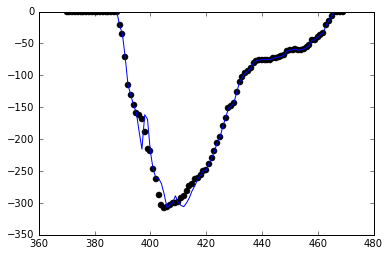

In [7]:
print (core[402:419])
print (core[465:470])
plt.plot(range(370,470),-core[370:470],'ko',range(370,470),-newdepths[370:470,0],'-')

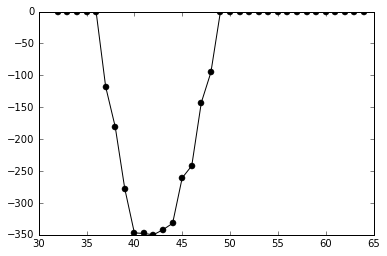

In [8]:
plt.plot(range(32,65), -north[32:65], 'ko-')

[  0.           0.           0.           0.          21.37890625] [ 7.4609375  0.         0.         0.         0.       ]
[ 304.5625     305.3125     303.375      301.1875     299.375      296.8125
  292.6875     287.25       280.875      274.4921875  268.9609375]


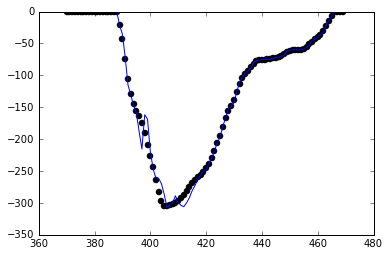

In [9]:
# smooth the west profile, twice
newcore = np.zeros(length)
newcore[:] = core
for i in range(360,500):
    newcore[i] = 0.25*core[i-1] + 0.5*core[i] + 0.25*core[i+1]
core[:] = newcore
for i in range(360,500):
    newcore[i] = 0.25*core[i-1] + 0.5*core[i] + 0.25*core[i+1]
core[:] = newcore
# rezero 387, 388 as we do not want to expand the domain
core[387:389] = 0
# rezero 466,467 for consistency but actually does nothing
core[466:468] = 0
print (core[385:390],core[465:470])
plt.plot(range(370,470),-core[370:470],'ko',range(370,470),-newdepths[370:470,0],'-')
print (core[405:416])

[   0.           0.           0.           0.           0.         110.9453125
  184.9765625  274.359375 ] [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 338.4296875  348.0625     348.6875     341.6875     324.2890625
  267.2734375  231.734375   149.1015625   89.3125       0.           0.
    0.           0.           0.           0.       ]


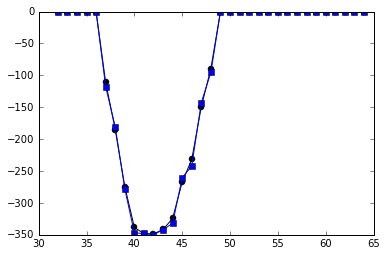

In [10]:
# smooth the north profile by one-half the above for the west
newnorth = np.zeros(width)
newnorth[:] = north
for i in range(32, 65):
    newnorth[i] = 0.125*north[i-1] + 0.75*north[i] + 0.125*north[i+1]
north[:] = newnorth
# rezero 36 as we do not want to expand the domain
north[36] = 0
# rezero 49
north[49] = 0
print (north[32:40],north[55:65])
plt.plot(range(32, 65),-north[32:65],'ko-',range(32, 65),-newdepths[897, 32:65],'-s')
print (north[40:55])

We now have "core" which is the bathymetry at the mouth.  This continues 5 more grid points into the domain.  Beyond that we blend into the original bathymetry linearly over the next 10 grid points.  The only difficulty is that we need to follow the bathymetry south-east, so we need to shift south as we go.

/home/sallen/anaconda/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:5: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.


[380, 430, -325, -250]

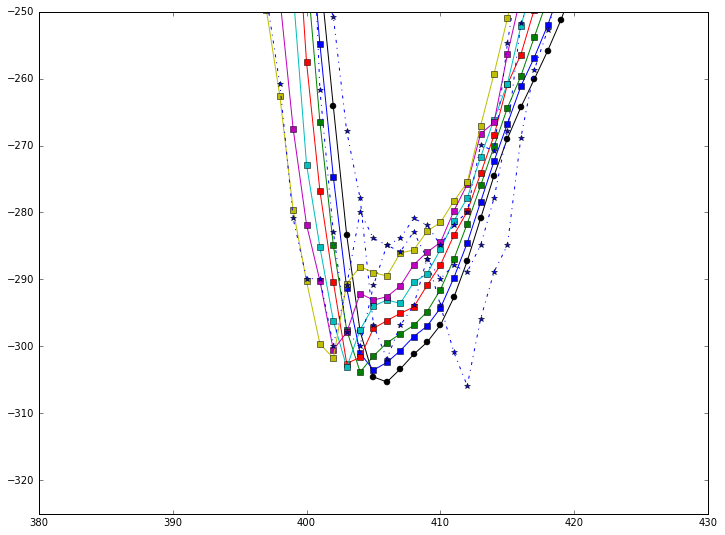

In [11]:
# reset newdepths so you can run this cell multiple times
# copy the depths array into newdepths
newdepths = depths[:,:]
# remove the mask, i.e. make masked variables 0
newdepths[newdepths.mask] = 0
#first 6 grid points (0-5) use the same, core profile.  After that merge into the original
#bathymetry, shifting South by half a grid point per grid point east.
for i in range(0,5):
    newdepths[370:470,i] = core[370:470]
i=5
newdepths[370:470,i] = (-i+15)/10.*core[370:470] + (i-5)/10.*newdepths[370:470,i]
i=6
newdepths[370:470,i] = (-i+15)/10.*(core[370:470]+core[371:471])/2. + (i-5)/10.*newdepths[370:470,i]
i=7
newdepths[370:470,i] = (-i+15)/10.*core[371:471] + (i-5)/10.*newdepths[370:470,i]
i=8
newdepths[370:470,i] = (-i+15)/10.*(core[371:471]+core[372:472])/2. + (i-5)/10.*newdepths[370:470,i]
i=9
newdepths[370:470,i] = (-i+15)/10.*core[372:472] + (i-5)/10.*newdepths[370:470,i]
i=10
newdepths[370:470,i] = (-i+15)/10.*(core[372:472]+core[373:473])/2. + (i-5)/10.*newdepths[370:470,i]
i=11
newdepths[370:470,i] = (-i+15)/10.*core[373:473] + (i-5)/10.*newdepths[370:470,i]
i=12
newdepths[370:470,i] = (-i+15)/10.*(core[373:473]+core[374:474])/2. + (i-5)/10.*newdepths[370:470,i]
i=13
newdepths[370:470,i] = (-i+15)/10.*core[374:474] + (i-5)/10.*newdepths[370:470,i]
i=14
newdepths[370:470,i] = (-i+15)/10.*(core[374:474]+core[375:475])/2. + (i-5)/10.*newdepths[370:470,i]

# reimplement the mask
shallow = newdepths[:] < 4
newdepths[shallow] = 0
newdepths_masked = np.ma.array(newdepths,mask=shallow)

# this graph was used to confirm the continuity of the southern channel
# the two stared lines are the extent of the sills seen in the original bathymetry
last = 12
first = 6
plt.figure(figsize=(12,9))
plt.plot(range(370,470),-core[370:470],'ko-',
         range(370,470),-newdepths_masked[370:470,first:last],'s-',
#         range(370,470),-depths[370:470,first:last],
         range(370,470),-depths[370:470,(1,6,10)],'*b-.')
plt.axis([380,430,-325,-250])


In [12]:
# shift north bathymetry 10 points west
newnorth = np.zeros_like(north)
newnorth[32+7:65+7] = north[32:65]

In [13]:
# reset newdepths so you can run this cell multiple times
# copy the depths array into newdepths
#newdepths = depths[:,:]
# remove the mask, i.e. make masked variables 0
#newdepths[newdepths.mask] = 0
#first 6 grid points (0-5) use the same, core profile shifted east.  After that merge into the original
#bathymetry, shifting South by half a grid point per grid point east.
north = newnorth
js = 37
je = 70
for i in range(898-5, 898):
    newdepths[i, js:je] = north[js:je]
i=5; ii=898-1-i
newdepths[ii, js:je] = (-i+15)/10.*north[js:je] + (i-5)/10.*newdepths[ii, js:je]
i=6; ii=898-1-i
newdepths[ii, js:je] = (-i+15)/10.*north[js-1:je-1] + (i-5)/10.*newdepths[ii, js:je]
#newdepths[ii, js:je] = (-i+15)/10.*(north[js:je]+north[js-1:je-1])/2. + (i-5)/10.*newdepths[ii, js:je]
i=7; ii=898-1-i
newdepths[ii, js:je] = (-i+15)/10.*north[js-2:je-2] + (i-5)/10.*newdepths[ii, js:je]
i=8; ii=898-1-i
newdepths[ii, js:je] = (-i+15)/10.*north[js-3:je-3] + (i-5)/10.*newdepths[ii, js:je]
#newdepths[ii, js:je] = (-i+15)/10.*(north[js-1:je-1]+north[js-2:je-2])/2. + (i-5)/10.*newdepths[ii, js:je]
i=9; ii=898-1-i
newdepths[ii, js:je] = (-i+15)/10.*north[js-4:je-4] + (i-5)/10.*newdepths[ii, js:je]
i=10; ii=898-1-i
newdepths[ii, js:je] = (-i+15)/10.*north[js-5:je-5] + (i-5)/10.*newdepths[ii, js:je]

#newdepths[ii, js:je] = (-i+15)/10.*(north[js-2:je-2]+north[js-3:je-3])/2. + (i-5)/10.*newdepths[ii, js:je]
i=11; ii=898-1-i
newdepths[ii, js:je] = (-i+15)/10.*north[js-6:je-6] + (i-5)/10.*newdepths[ii, js:je]
i=12; ii=898-1-i
newdepths[ii, js:je] = (-i+15)/10.*north[js-7:je-7] + (i-5)/10.*newdepths[ii, js:je]

#newdepths[ii, js:je] = (-i+15)/10.*(north[js-3:je-3]+north[js-4:je-4])/2. + (i-5)/10.*newdepths[ii, js:je]
i=13; ii=898-1-i
newdepths[ii, js:je] = (-i+15)/10.*north[js-8:je-8] + (i-5)/10.*newdepths[ii, js:je]
i=14; ii=898-1-i
newdepths[ii, js:je] = (-i+15)/10.*north[js-9:je-9] + (i-5)/10.*newdepths[ii, js:je]

#newdepths[ii, js:je] = (-i+15)/10.*(north[js-4:je-4]+north[js-5:je-5])/2. + (i-5)/10.*newdepths[ii, js:je]

# reimplement the mask
shallow = newdepths[:] < 4
newdepths[shallow] = 0
newdepths_masked = np.ma.array(newdepths,mask=shallow)

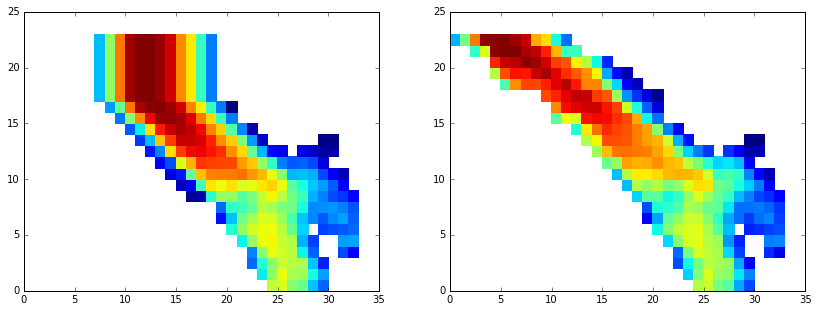

In [14]:
# plot north
fig, ax = plt.subplots(1, 2, figsize=(14,5))
ax[0].pcolormesh(newdepths_masked[875:,js:je])
ax[1].pcolormesh(depths[875:, js:je])

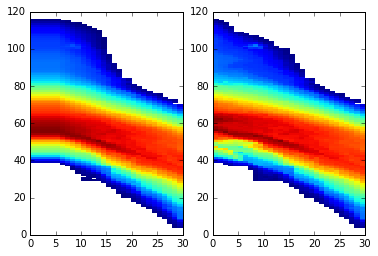

In [15]:
# plot
plt.subplot(1,2,1)
plt.pcolormesh(newdepths_masked[350:470,:30])
plt.subplot(1,2,2)
plt.pcolormesh(depths[350:470,:30])

There are two unlikeable parts to the above (left-hand) bathymetry. 
1) weird little bay (think this is Neah Bay).  Put it back based on original bathymetry.

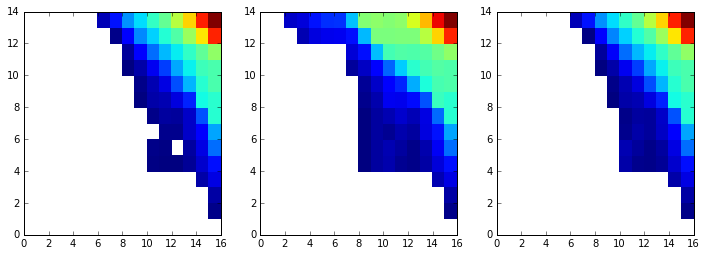

In [16]:
top=389
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.pcolormesh(newdepths_masked[375:top,:16])
plt.subplot(1,3,2)
plt.pcolormesh(depths[375:top,:16])
special = np.zeros((length, width))
special[:,:] = newdepths_masked[:,:]
special[375+4:375+7,10:13] = depths[375+4:375+7,10:13]
plt.subplot(1,3,3)
# reimplement the mask
newshallow = special[:] < 4
special_masked = np.ma.array(special,mask=newshallow)
plt.pcolormesh(special_masked[375:top,:16])


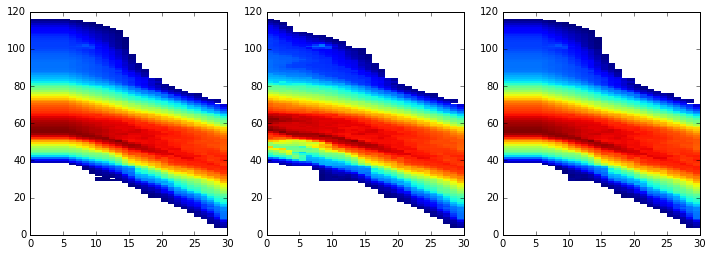

In [17]:
# plot
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.pcolormesh(newdepths_masked[350:470,:30])
plt.subplot(1,3,2)
plt.pcolormesh(depths[350:470,:30])
plt.subplot(1,3,3)
plt.pcolormesh(special_masked[350:470,:30])

So Neah Bay is restored (right panel above) but 2) there is too much extra shallow water in the North.  We can't get rid of all of it, it is partially due to the direct Eastward extension of the boundary, but we can crop some.

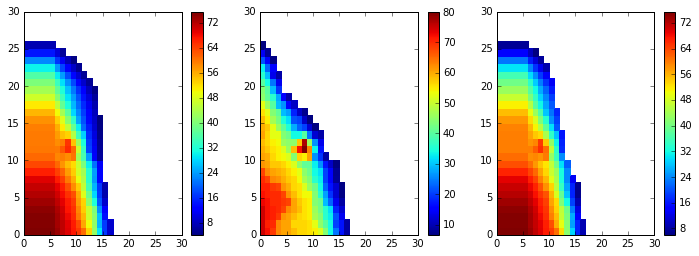

In [18]:
top=470
bot=440
gs=0
left = 3
right = 30
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.pcolormesh(newdepths_masked[bot+gs:top,:right])
plt.colorbar()
plt.subplot(1,3,2)
plt.pcolormesh(depths[bot+gs:top,:right])
plt.colorbar()
special[bot+23,6+left:12+left] = 0
special[bot+21:bot+23,7+left:12+left] = 0
special[bot+17:bot+21,8+left:12+left] = 0
special[bot+14:bot+17,9+left:12+left] = 0
special[bot+10:bot+14,10+left:12+left] = 0
special[bot+8:bot+10,11+left:12+left] = 0

# reimplement the mask
newshallow = special[:] < 4
special_masked = np.ma.array(special,mask=newshallow)
plt.subplot(1,3,3)
plt.pcolormesh(special_masked[bot+gs:top,:right])
plt.colorbar()

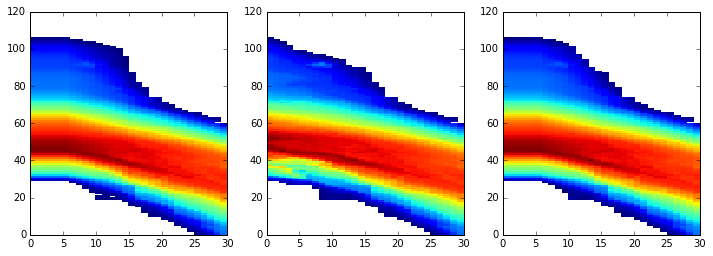

In [19]:
# plot
bot=360
top=470
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.pcolormesh(newdepths_masked[bot:top,:30])
plt.subplot(1,3,2)
plt.pcolormesh(depths[bot:top,:30])
plt.subplot(1,3,3)
plt.pcolormesh(special_masked[bot:top,:30])

So above show *Middle* original bathymetry, *Left* raw JdF topography, *Right* final JdF topography.

Lastly save into our new file.  Update the metadata.  Note that you need to move the produced file into nemo-forcing and commit it there.

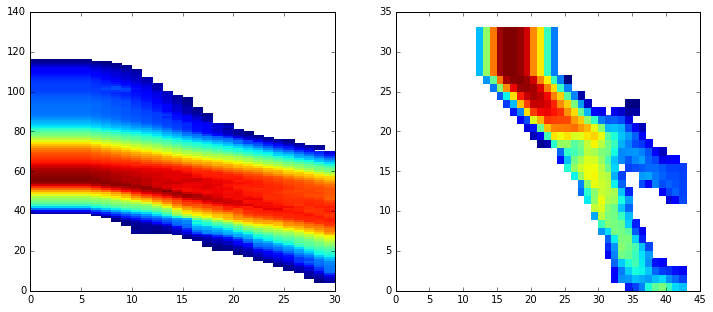

In [20]:
# reassign to "depths"
depths[:] = special_masked
fig, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].pcolormesh(depths[350:480,:30])
ax[1].pcolormesh(depths[865:, 32:75])

In [21]:
# lets smooth
max_dh_over_hbar = 0.8
final_bathy = bathy_tools.smooth(depths[:], max_norm_depth_diff=max_dh_over_hbar, smooth_factor=0.2)

In [22]:
depths[:] = final_bathy
nc_tools.show_dataset_attrs(bathy)

file format: NETCDF4
history: 
[2013-10-30 13:18] Created netCDF4 zlib=True dataset.
[2013-10-30 15:22] Set depths between 0 and 4m to 4m and those >428m to 428m.
[2013-10-31 17:10] Algorithmic smoothing.
[2013-11-21 19:53] Reverted to pre-smothing dataset (repo rev 3b301b5b9b6d).
[2013-11-21 20:14] Updated dataset and variable attributes to CF-1.6 conventions & project standards.
[2013-11-21 20:47] Removed east end of Jervis Inlet and Toba Inlet region due to deficient source bathymetry data in Cascadia dataset.
[2013-11-21 21:52] Algorithmic smoothing.
[2014-01-01 14:44] Smoothed mouth of Juan de Fuca
[2015-] Jie made Fraser River
[2015-12-24 11:46] dropped by one grid thickness, smoothed to 0.8

conventions: 
CF-1.6
title: 
Salish Sea NEMO Bathymetry
institution:  
Dept of Earth, Ocean & Atmospheric Sciences, University of British Columbia
references:  
https://bitbucket.org/salishsea/nemo-forcing/src/tip/grid/bathy_downonegrid.nc
comment: 
Based on 1_bathymetry_seagrid_WestCoast.nc

bathy.history = """
[2013-10-30 13:18] Created netCDF4 zlib=True dataset.
[2013-10-30 15:22] Set depths between 0 and 4m to 4m and those >428m to 428m.
[2013-10-31 17:10] Algorithmic smoothing.
[2013-11-21 19:53] Reverted to pre-smothing dataset (repo rev 3b301b5b9b6d).
[2013-11-21 20:14] Updated dataset and variable attributes to CF-1.6 conventions & project standards.
[2013-11-21 20:47] Removed east end of Jervis Inlet and Toba Inlet region due to deficient source bathymetry data in Cascadia dataset.
[2013-11-21 21:52] Algorithmic smoothing.
[2015-] Jie made Fraser River
[2015-12-24 11:46] dropped by one grid thickness, smoothed to 0.8
[2016-06-18 18:54] smoothed Juan de Fuca and Johnstone Strait mouths, checked smoothed to 0.8
"""
bathy.source = """
https://bitbucket.org/salishsea/tools/src/tip/bathymetry/SalishSeaBathy.ipynb
https://bitbucket.org/salishsea/tools/src/tip/bathymetry/Deepen by Grid Thickness.ipynb
https://bitbucket.org/salishsea/tools/src/tip/bathymetry/SmoothMouthJdF-DownOneGrid.ipynb

"""

In [23]:
bathy.close()

Now, because of bug that we can't change attributes without crashing, reopen file with xarray to fix history and source.

In [24]:
import xarray as xr

/home/sallen/anaconda/envs/py3/lib/python3.5/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [26]:
!cp bathy_downonegrid2.nc bathy_downonegrid_temp.nc
ds = xr.open_dataset('./bathy_downonegrid_temp.nc')
print (ds)

<xarray.Dataset>
Dimensions:     (x: 398, y: 898)
Coordinates:
  * x           (x) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * y           (y) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
Data variables:
    nav_lon     (y, x) float64 -123.4 -123.4 -123.4 -123.4 -123.4 -123.4 ...
    nav_lat     (y, x) float64 46.86 46.86 46.86 46.87 46.87 46.87 46.87 ...
    Bathymetry  (y, x) float64 nan nan nan nan nan nan nan nan nan nan nan ...
Attributes:
    history: 
[2013-10-30 13:18] Created netCDF4 zlib=True dataset.
[2013-10-30 15:22] Set depths between 0 and 4m to 4m and those >428m to 428m.
[2013-10-31 17:10] Algorithmic smoothing.
[2013-11-21 19:53] Reverted to pre-smothing dataset (repo rev 3b301b5b9b6d).
[2013-11-21 20:14] Updated dataset and variable attributes to CF-1.6 conventions & project standards.
[2013-11-21 20:47] Removed east end of Jervis Inlet and Toba Inlet region due to deficient source bathymetry data in Cascadia dataset.
[2013-11...
  

In [27]:
ds.attrs['history'] = """
[2013-10-30 13:18] Created netCDF4 zlib=True dataset.
[2013-10-30 15:22] Set depths between 0 and 4m to 4m and those >428m to 428m.
[2013-10-31 17:10] Algorithmic smoothing.
[2013-11-21 19:53] Reverted to pre-smothing dataset (repo rev 3b301b5b9b6d).
[2013-11-21 20:14] Updated dataset and variable attributes to CF-1.6 conventions & project standards.
[2013-11-21 20:47] Removed east end of Jervis Inlet and Toba Inlet region due to deficient source bathymetry data in Cascadia dataset.
[2013-11-21 21:52] Algorithmic smoothing.
[2015-] Jie made Fraser River
[2015-12-24 11:46] dropped by one grid thickness, smoothed to 0.8
[2016-06-18 18:54] smoothed Juan de Fuca and Johnstone Strait mouths, checked smoothed to 0.8
"""
ds.attrs['source'] = """
https://bitbucket.org/salishsea/tools/src/tip/bathymetry/SalishSeaBathy.ipynb
https://bitbucket.org/salishsea/tools/src/tip/bathymetry/Deepen by Grid Thickness.ipynb
https://bitbucket.org/salishsea/tools/src/tip/bathymetry/SmoothMouthJdF-DownOneGrid.ipynb
"""
ds.attrs['references'] = """
https://bitbucket.org/salishsea/nemo-forcing/src/tip/grid/bathy_downonegrid2.nc
"""

In [28]:
ds.attrs

OrderedDict([('history',
              '\n[2013-10-30 13:18] Created netCDF4 zlib=True dataset.\n[2013-10-30 15:22] Set depths between 0 and 4m to 4m and those >428m to 428m.\n[2013-10-31 17:10] Algorithmic smoothing.\n[2013-11-21 19:53] Reverted to pre-smothing dataset (repo rev 3b301b5b9b6d).\n[2013-11-21 20:14] Updated dataset and variable attributes to CF-1.6 conventions & project standards.\n[2013-11-21 20:47] Removed east end of Jervis Inlet and Toba Inlet region due to deficient source bathymetry data in Cascadia dataset.\n[2013-11-21 21:52] Algorithmic smoothing.\n[2015-] Jie made Fraser River\n[2015-12-24 11:46] dropped by one grid thickness, smoothed to 0.8\n[2016-06-18 18:54] smoothed Juan de Fuca and Johnstone Strait mouths, checked smoothed to 0.8\n'),
             ('conventions', '\nCF-1.6'),
             ('title', '\nSalish Sea NEMO Bathymetry'),
             ('institution',
              ' \nDept of Earth, Ocean & Atmospheric Sciences, University of British Columbia'),


In [32]:
ds.to_netcdf(path='./bathy_downonegrid2.nc')
ds.close()

In [33]:
nds = xr.open_dataset('./bathy_downonegrid2.nc')
print (nds.attrs)

OrderedDict([('history', '\n[2013-10-30 13:18] Created netCDF4 zlib=True dataset.\n[2013-10-30 15:22] Set depths between 0 and 4m to 4m and those >428m to 428m.\n[2013-10-31 17:10] Algorithmic smoothing.\n[2013-11-21 19:53] Reverted to pre-smothing dataset (repo rev 3b301b5b9b6d).\n[2013-11-21 20:14] Updated dataset and variable attributes to CF-1.6 conventions & project standards.\n[2013-11-21 20:47] Removed east end of Jervis Inlet and Toba Inlet region due to deficient source bathymetry data in Cascadia dataset.\n[2013-11-21 21:52] Algorithmic smoothing.\n[2015-] Jie made Fraser River\n[2015-12-24 11:46] dropped by one grid thickness, smoothed to 0.8\n[2016-06-18 18:54] smoothed Juan de Fuca and Johnstone Strait mouths, checked smoothed to 0.8\n'), ('conventions', '\nCF-1.6'), ('title', '\nSalish Sea NEMO Bathymetry'), ('institution', ' \nDept of Earth, Ocean & Atmospheric Sciences, University of British Columbia'), ('references', '\nhttps://bitbucket.org/salishsea/nemo-forcing/src/

In [34]:
nds.close()